# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [1]:
import os

practice_dir_path = '/Users/lisisian/VS-code/TimeSeries/2025-Cherkasov-TimeSeriesCourse/practice/04 Matrix profile'
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [5]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [2]:
pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 580.4 kB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 623.3 kB/s  0:00:57m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [stumpy]2m1/3 [numba]
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy==2.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 727.7 kB/s  0:00:250:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-2.0.0-cp313-cp313-macosx_15_0_arm64.whl size=4856852 sha256=43ca9dcaabec32a7d834f6abfb8ab91494af67027a36efb217f71ba81c453393
  Stored in directory: /Users/lisisian/Library/Caches/pip/wheels/e0/d3/66/30d07c18e56ac859b5e8d3ceaf22f093a09bae124a472b85d1
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

In [5]:
pip install --upgrade numpy scipy


  Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [11]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [12]:
plot_ts(ts, "Input time series")

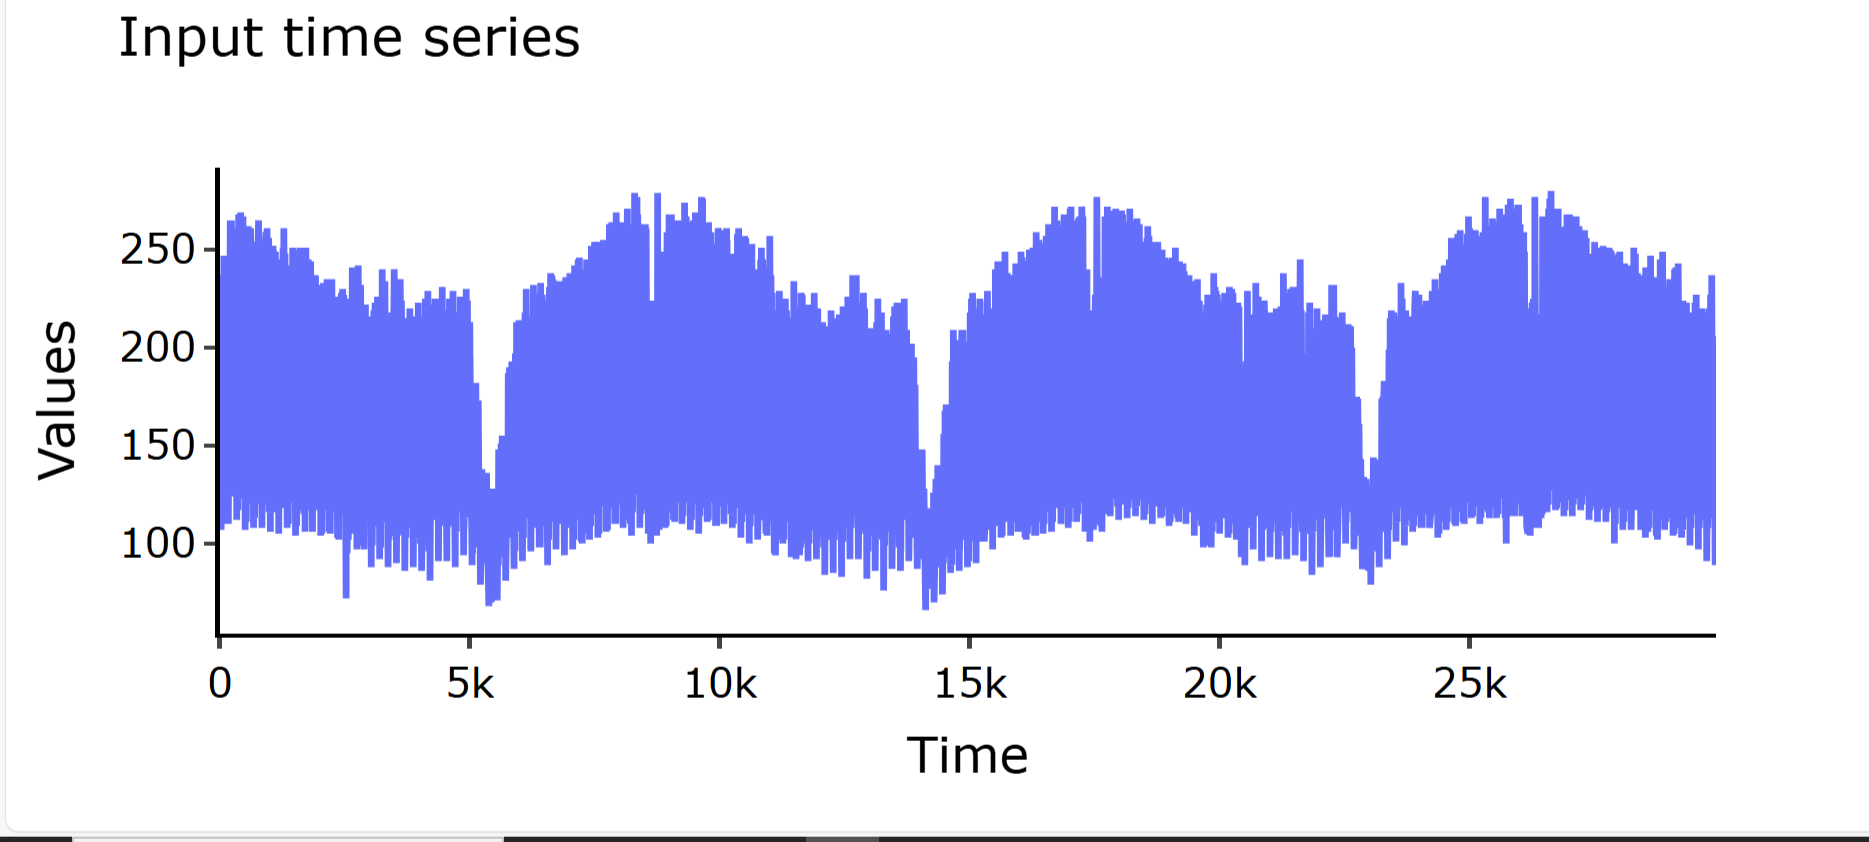

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [13]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}


In [14]:
# Вычисление матричного профиля
mp = compute_mp(ts1=ts, m=m)
# Вывод результатов 
print("Matrix Profile:", mp['mp'])
print("Matrix Profile Indices:", mp['mpi'])

Matrix Profile: [2.6090936641684754 2.5924180135436403 2.5987763812474363 ...
 2.00768186761169 2.0206415581726054 2.030675731612961]
Matrix Profile Indices: [ 8761  8762  8763 ... 21195 21196 21197]


Визуализируйте найденный матричный профиль ряда.

In [15]:
plot_ts(mp['mp'], "Matrix Profile")

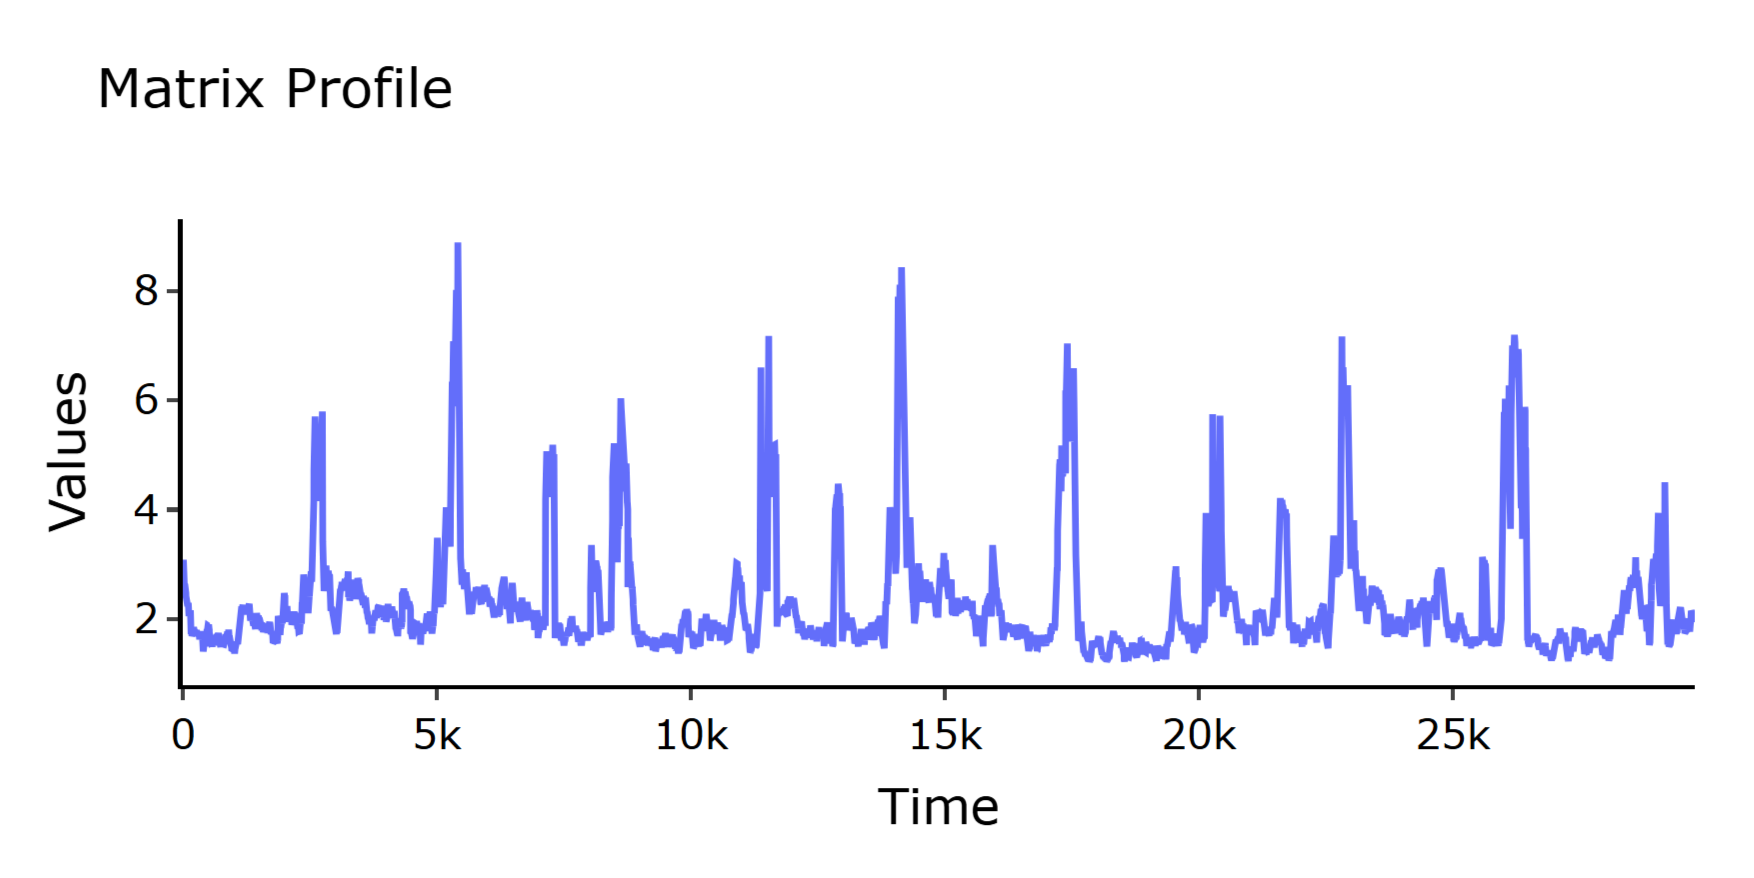

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [16]:
top_k = 6
motifs = {}



In [17]:
# Поиск топ-6 мотивов
top_k = 6
motifs = top_k_motifs(matrix_profile=mp, top_k=top_k)

# Вывод результатов
print("Top-6 Motifs Indices:", motifs['indices'])
print("Top-6 Motifs Distances:", motifs['distances'])

Top-6 Motifs Indices: [(17852, 18188), (17853, 18189), (17858, 18194), (17859, 18195), (18539, 27276), (17857, 18193)]
Top-6 Motifs Distances: [1.2266251888855342, 1.2319762049914282, 1.2331215982682417, 1.2348270474649155, 1.2356334381463014, 1.236240588857564]


Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [18]:
plot_motifs(mp, motifs)

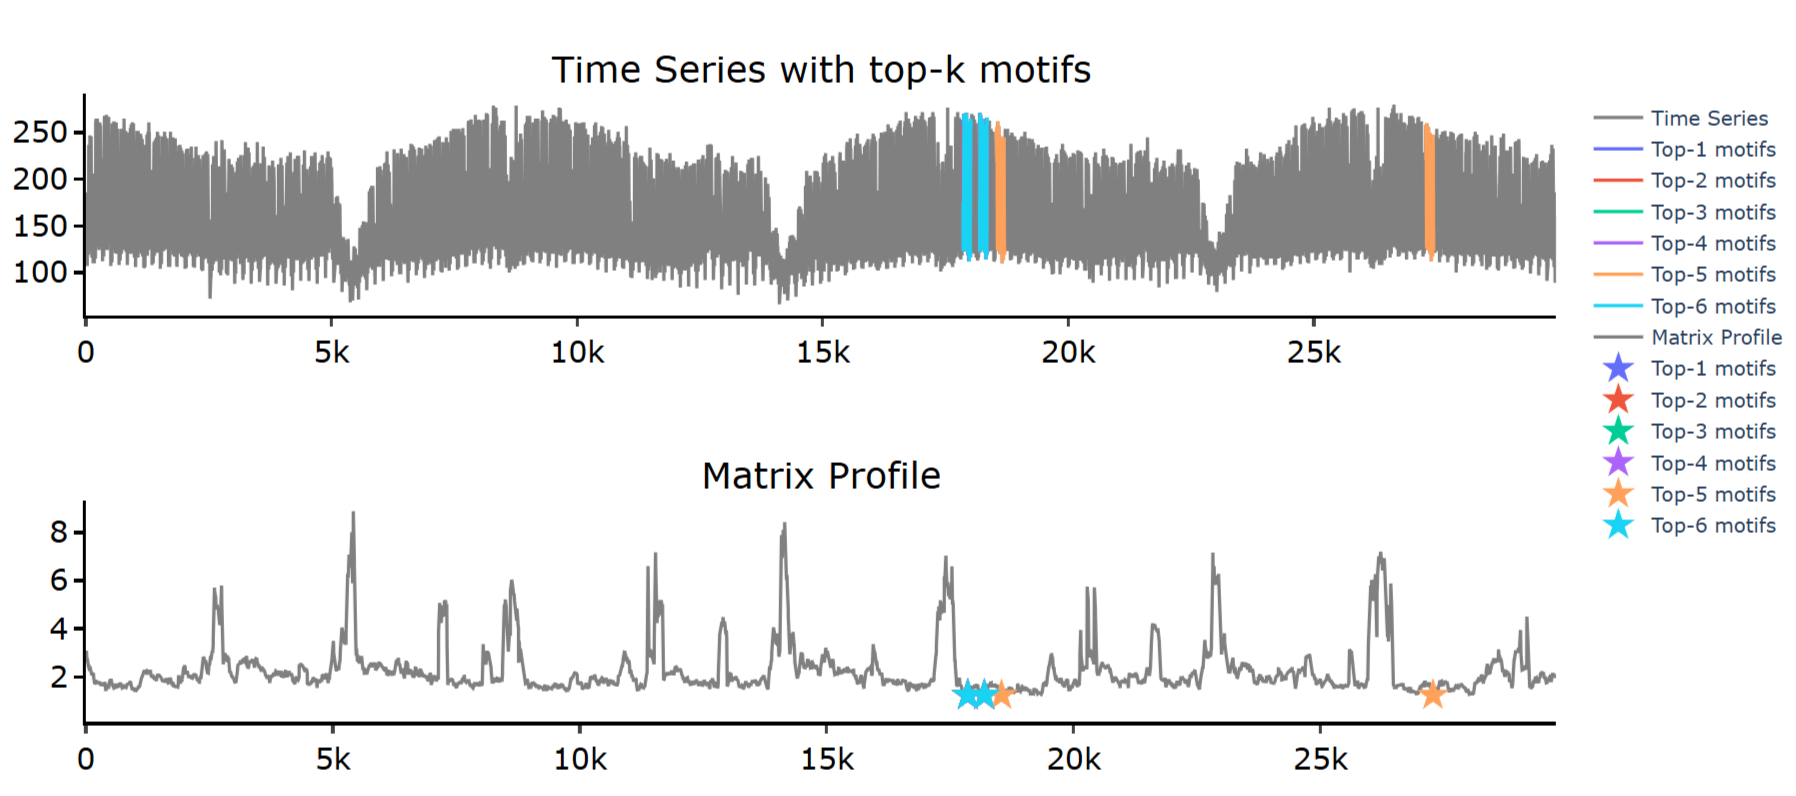  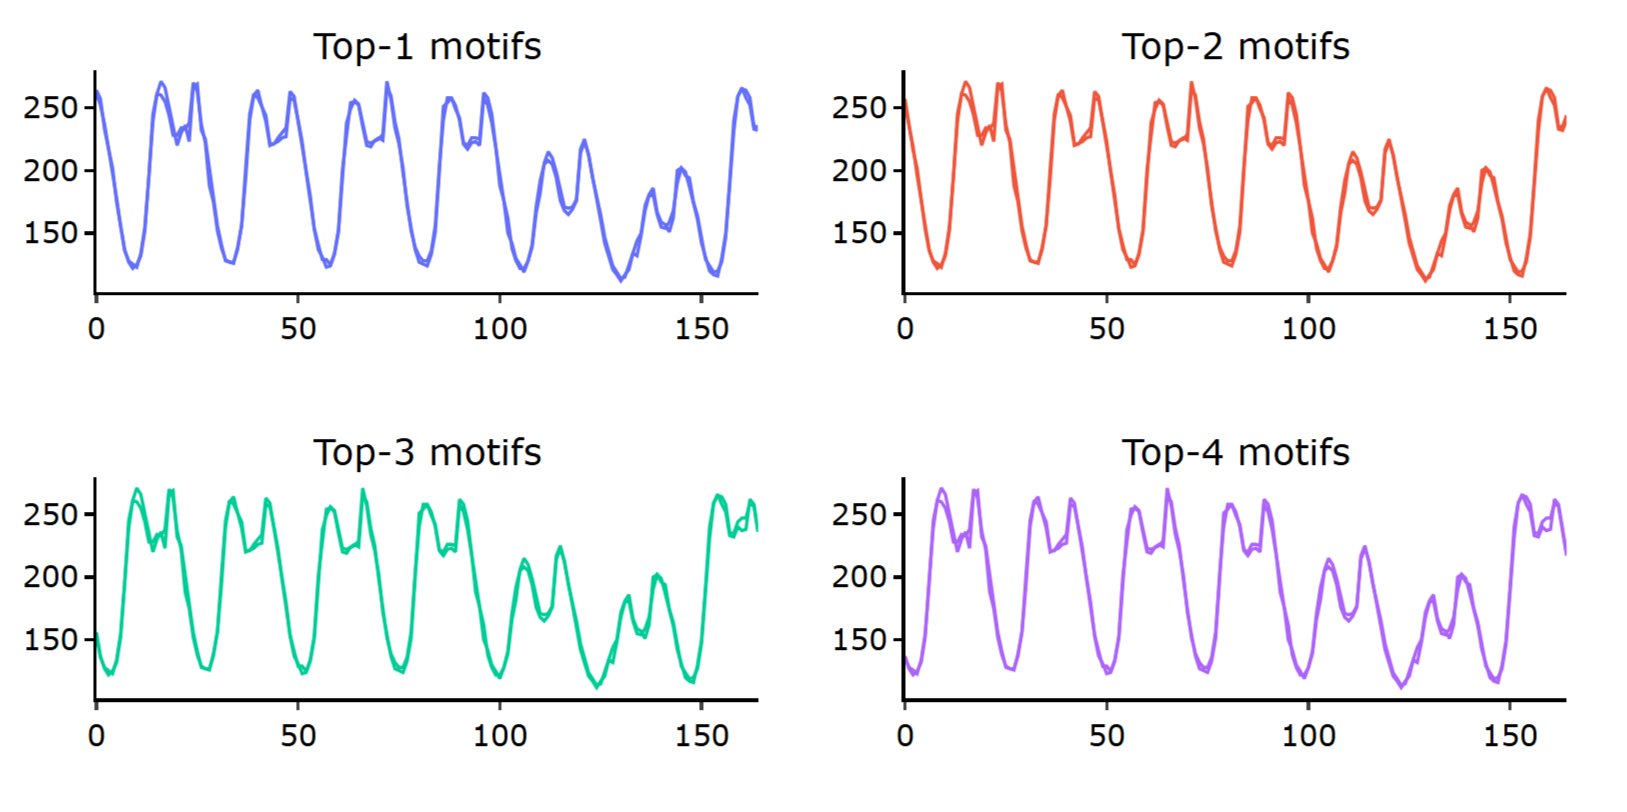 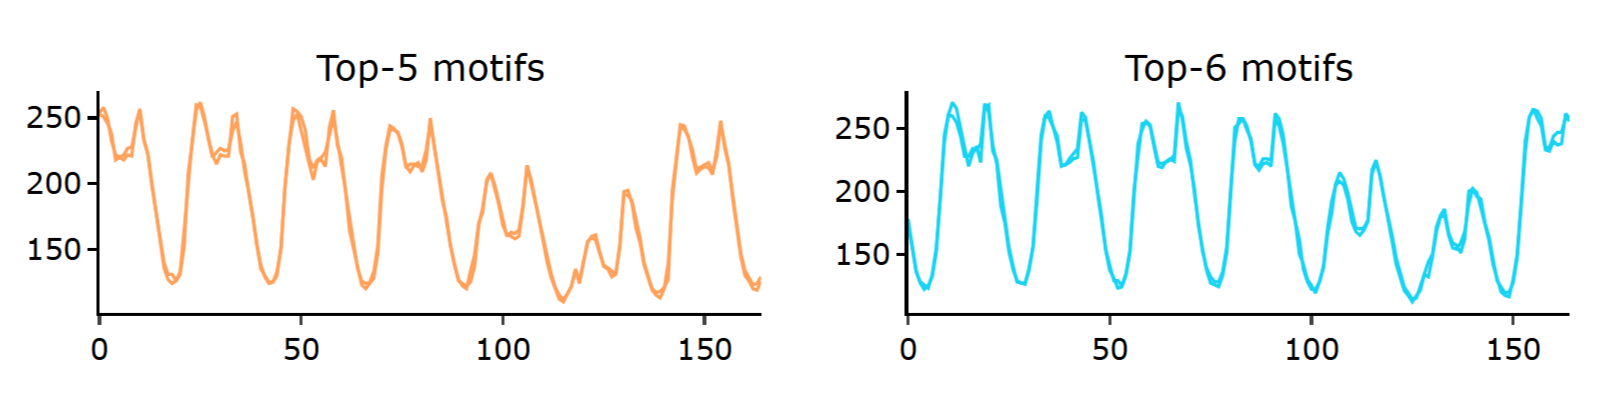

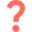
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*

Общий анализ

На графике представлен временной ряд с выраженными сезонными колебаниями, вероятно отражающий суточную динамику энергопотребления. Анализ выявил шесть наиболее значимых повторяющихся паттернов (мотивов), характеризующихся:

- **Высоким сходством** - расстояния между парными сегментами составляют 1.2-1.3 единицы
- **Циклической природой** - мотивы соответствуют регулярным пикам нагрузки
- **Структурной устойчивостью** - паттерны сохраняются на протяжении всего ряда

**Практическая значимость**
Обнаруженные мотивы представляют типичные сценарии энергопотребления, что позволяет:
- Повысить точность прогнозных моделей
- Выявлять аномалии при отклонении от ожидаемых паттернов
- Оптимизировать планирование генерации и распределения энергии

**Заключение**
Метод матричного профиля эффективно идентифицировал ключевые повторяющиеся паттерны в данных энергопотребления, подтвердив циклический характер нагрузки и предоставив ценную информацию для построения прогнозных моделей и мониторинга аномалий.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [19]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

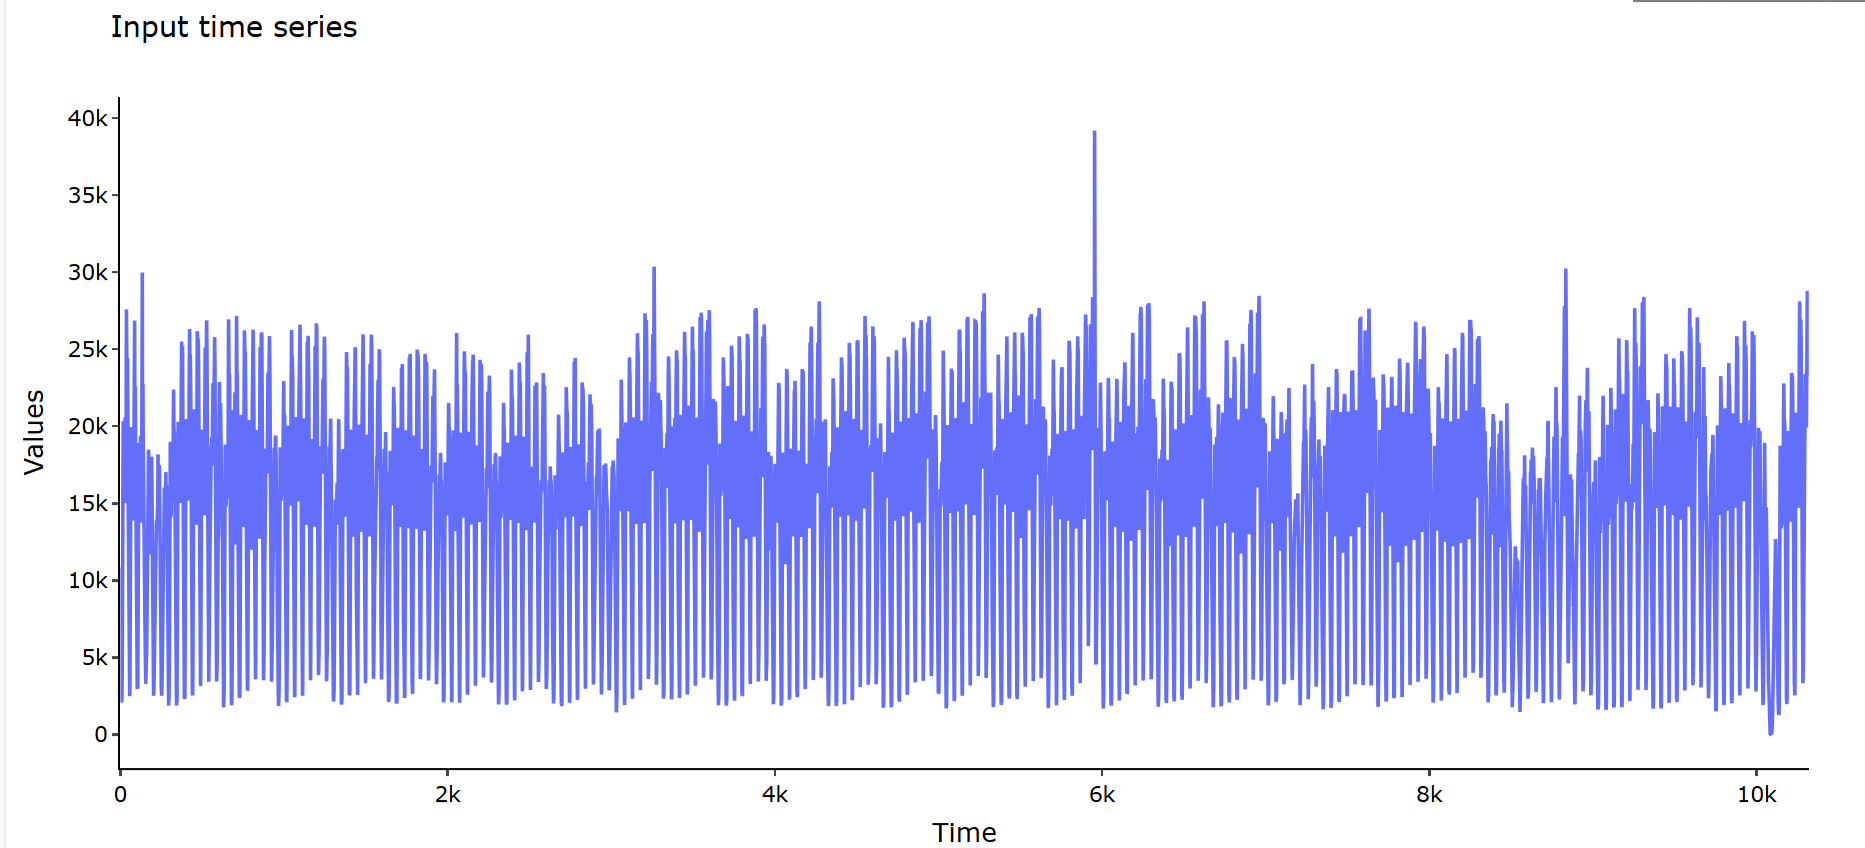

In [20]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy().astype(np.float64)

mp = compute_mp(ts, m)  


In [21]:
print(type(mp))
print(mp)


<class 'dict'>
{'mp': mparray([1.6758795908961541, 1.7062148811057143, 1.7171465700599446, ...,
         1.2289710996488397, 1.2082817443578697, 1.1948212746737672],
        dtype=object), 'mpi': mparray([ 336,  337,  338, ..., 9550, 9551, 9552]), 'm': 96, 'data': {'ts1': array([10844.,  8127.,  6210., ..., 27309., 26591., 26288.]), 'ts2': None}}


In [22]:
# Устанавливаем зону исключения и вычисляем top-k дискордов
m = 96
excl_zone = int(np.ceil(m / 2))  # Определяем exclusion zone
top_k = 15
discords = top_k_discords(matrix_profile=mp, excl_zone=excl_zone, top_k=top_k)

# Вывод результатов
print("Top-15 Индексы Дискордов:", discords['indices'])
print("Top-15 Дистанции Дискордов:", discords['distances'])
print("Top-15 Индексы Ближайших Соседей Дискордов:", discords['nn_indices'])

Top-15 Индексы Дискордов: [9985, 10048, 8784, 10097, 8837, 5868, 105, 9651, 8449, 5954, 7107, 154, 8396, 8640, 2930]
Top-15 Дистанции Дискордов: [7.67611937328928, 7.528591080691795, 6.0735510994492445, 5.111043244960375, 4.4922940126597695, 4.24104374580838, 4.165698256274298, 3.9471034653624595, 3.7361108831969605, 3.706803612131956, 3.698884380036356, 3.441477020451118, 3.3602385691082866, 3.2855364012282813, 3.1770979488517614]
Top-15 Индексы Ближайших Соседей Дискордов: [9650, 8469, 9263, 257, 5618, 6204, 7112, 8307, 7104, 5282, 8452, 7210, 8348, 7295, 194]


Выполните визуализацию найденных top-$k$ диссонансов.

In [23]:
plot_discords(mp, discords)

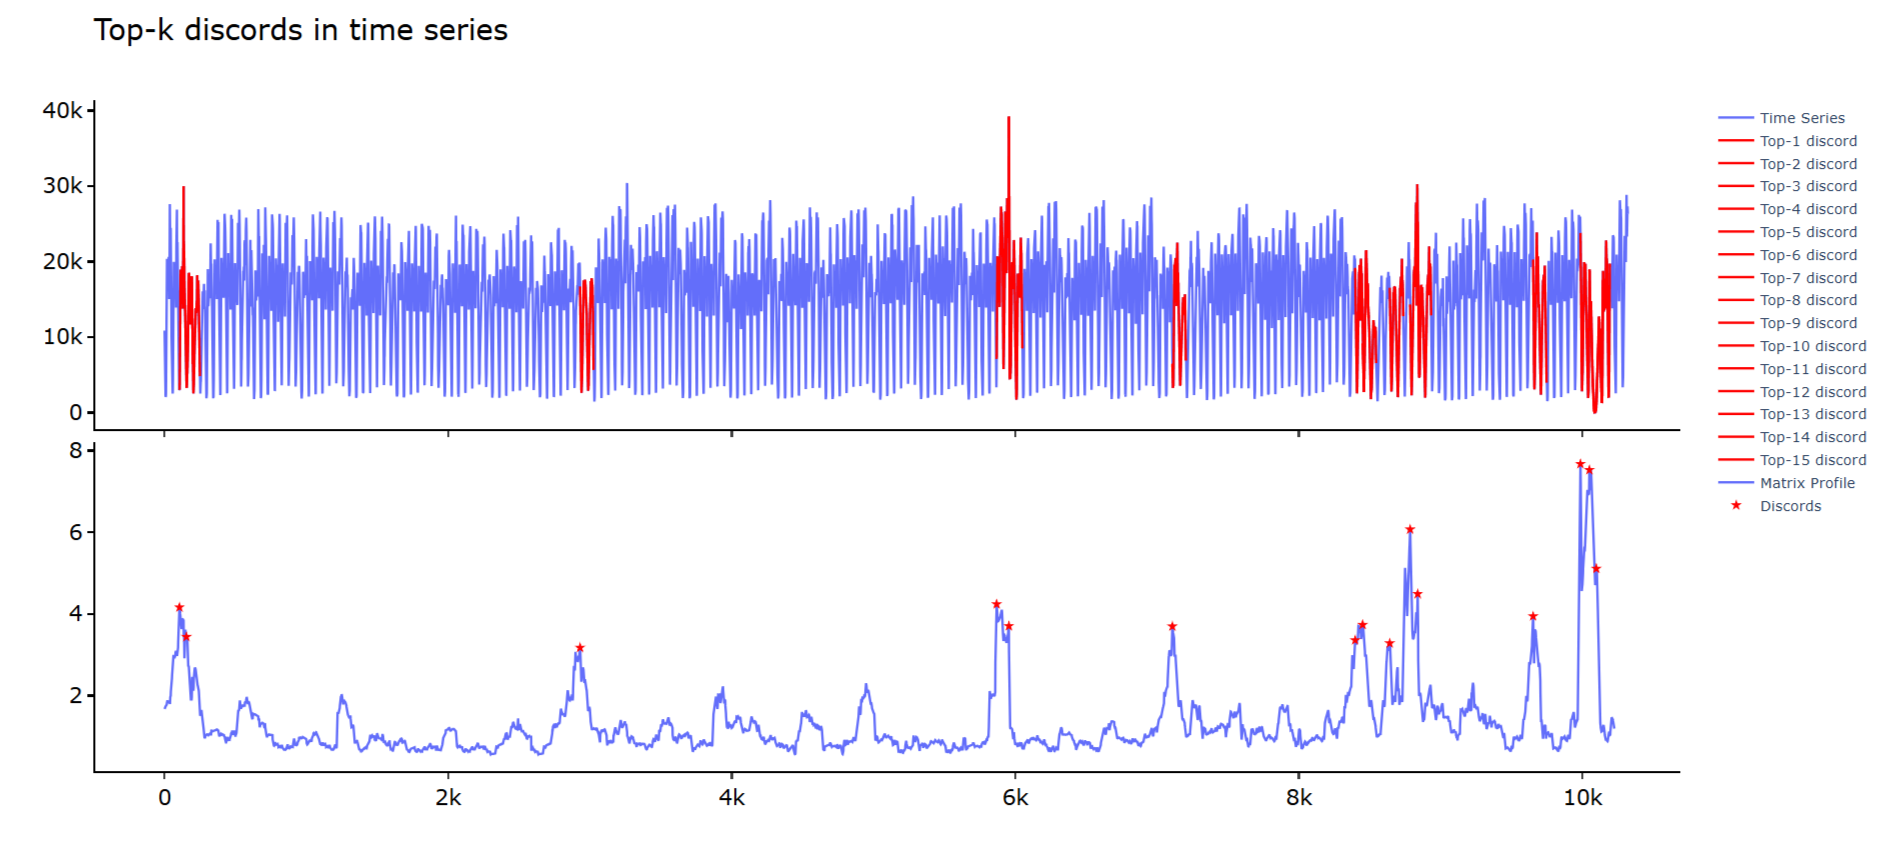

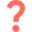
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*

**Анализ аномалий во временном ряде такси Нью-Йорка**

Исследование выявило 15 ключевых аномалий (дискордов) в данных о количестве поездок на такси:

**Характеристики аномалий:**
- Наиболее значимая аномалия (индекс 9985) имеет максимальное расстояние 7.676, что указывает на сильное отклонение от типичных паттернов
- Аномалии проявляются как резкие пики и спады на фоне обычной сезонной динамики
- Выявленные сегменты минимально похожи на остальные участки ряда

**Возможные причины:**
- Праздничные дни и массовые мероприятия
- Экстремальные погодные условия
- Транспортные коллапсы или дорожные происшествия
- Технические сбои в системе сбора данных

**Практическая ценность:**
Обнаруженные аномалии представляют особый интерес для:
- Анализа воздействия внешних событий на транспортную систему
- Выявления редких, но значимых паттернов спроса
- Совершенствования систем мониторинга и прогнозирования

Метод матричного профиля эффективно идентифицировал критические точки временного ряда, соответствующие реальным нестандартным ситуациям в городской среде.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [24]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [25]:
plot_ts(ts, "Input time series")

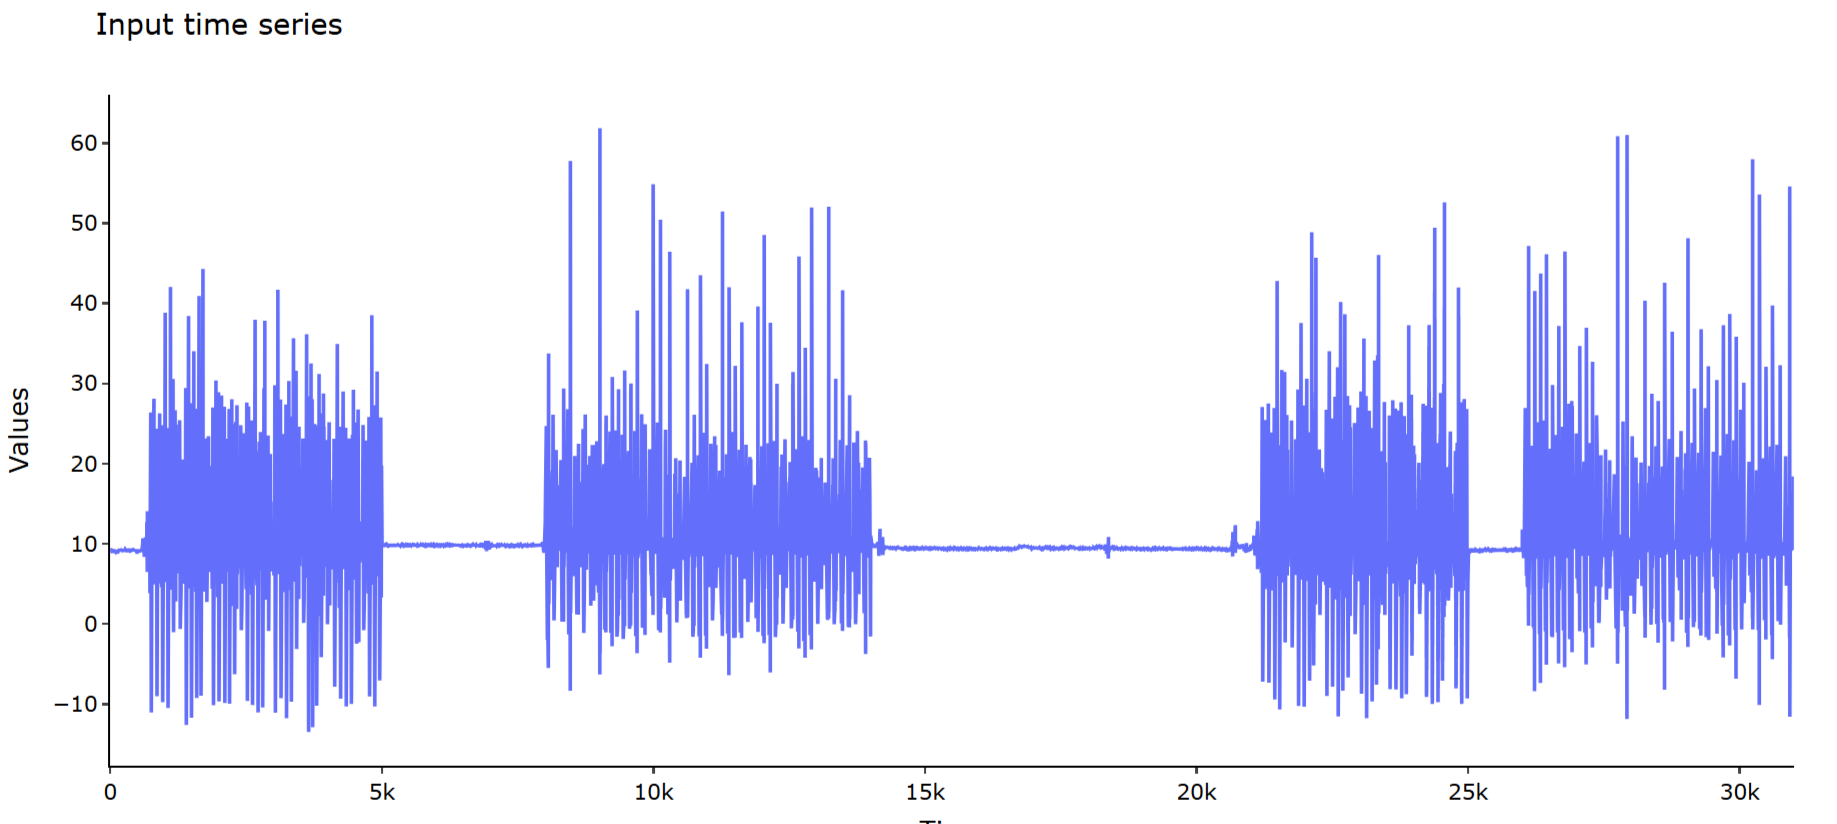

Найдите и визуализируйте матричный профиль временного ряда.

In [26]:
m = 100
excl_zone = m
mp = {}
mp = compute_mp(ts, m)  


In [27]:
plot_ts(mp['mp'], "Matrix Profile")

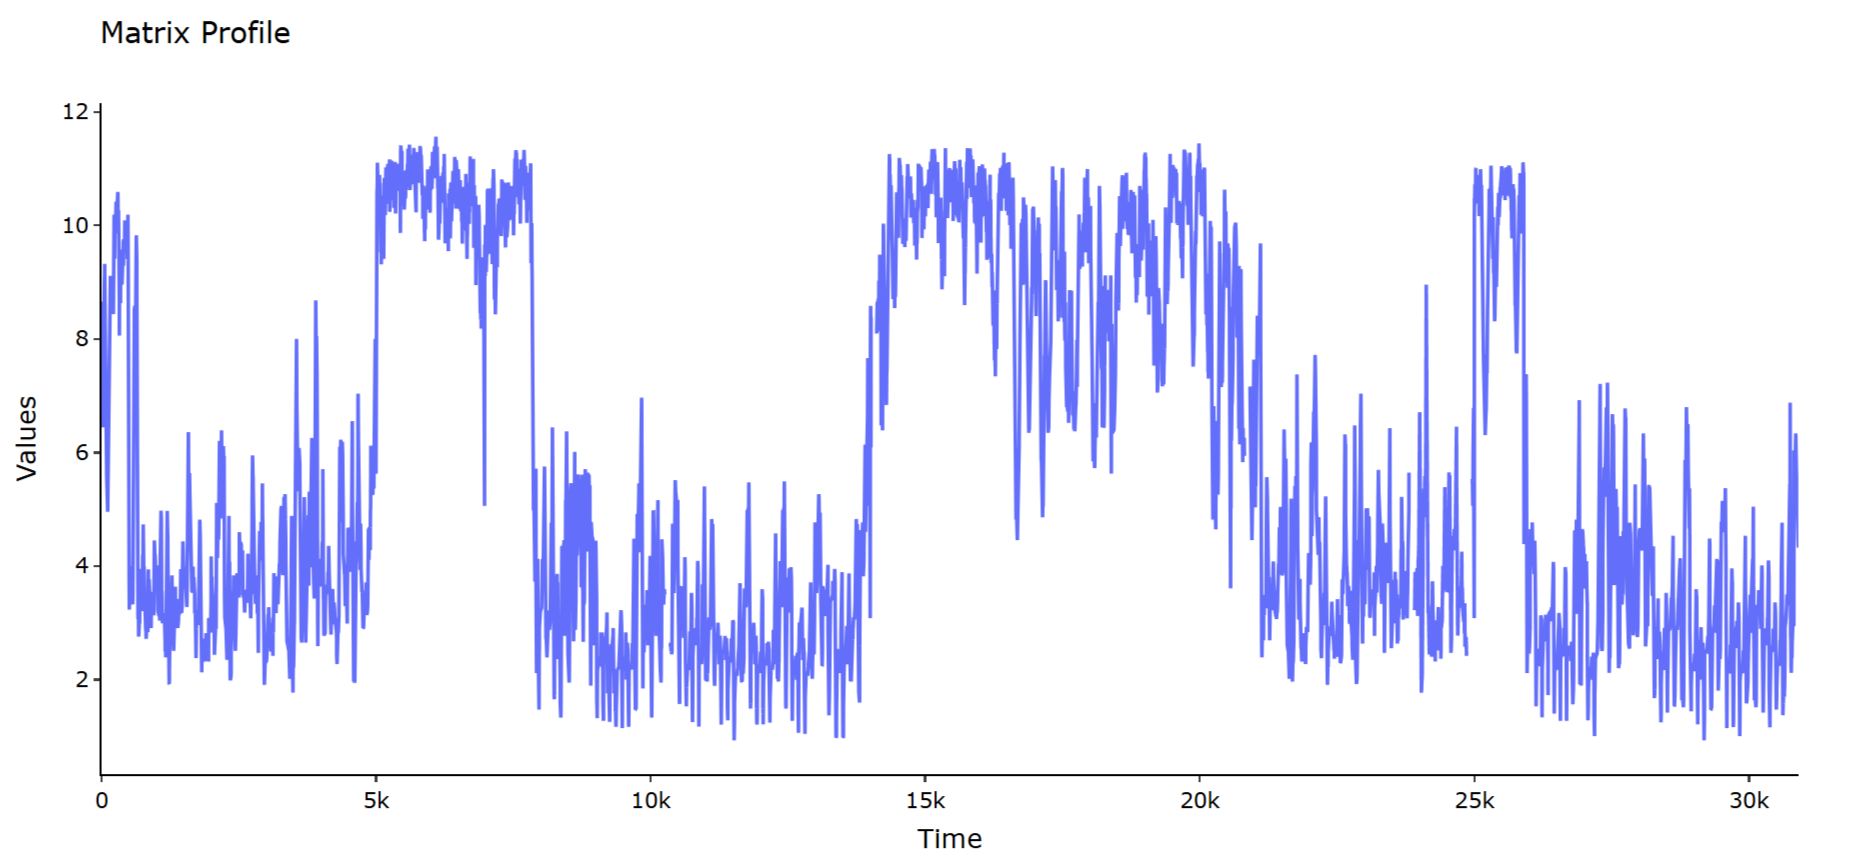

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [28]:
threshold = 8



In [29]:
try:
    mp['mp'] = mp['mp'].astype(float)
except ValueError:
    print("Ошибка преобразования: массив mp['mp'] содержит нечисловые значения.")


In [30]:
if np.isnan(mp['mp']).any() or np.isinf(mp['mp']).any():
    mp['mp'] = np.nan_to_num(mp['mp'], nan=np.nanmax(mp['mp']), posinf=np.nanmax(mp['mp']), neginf=np.nanmin(mp['mp']))


In [31]:
# Проверка и обработка бесконечных значений и значений NaN
mp['mp'] = np.where(np.isinf(mp['mp']) | np.isnan(mp['mp']), np.nan, mp['mp'])

# Удаление всех NaN значений из матричного профиля
mp['mp'] = mp['mp'][~np.isnan(mp['mp'])]



Выполните визуализацию результатов сегментации повторяющихся активностей.

In [32]:
plot_segmentation(mp, threshold)

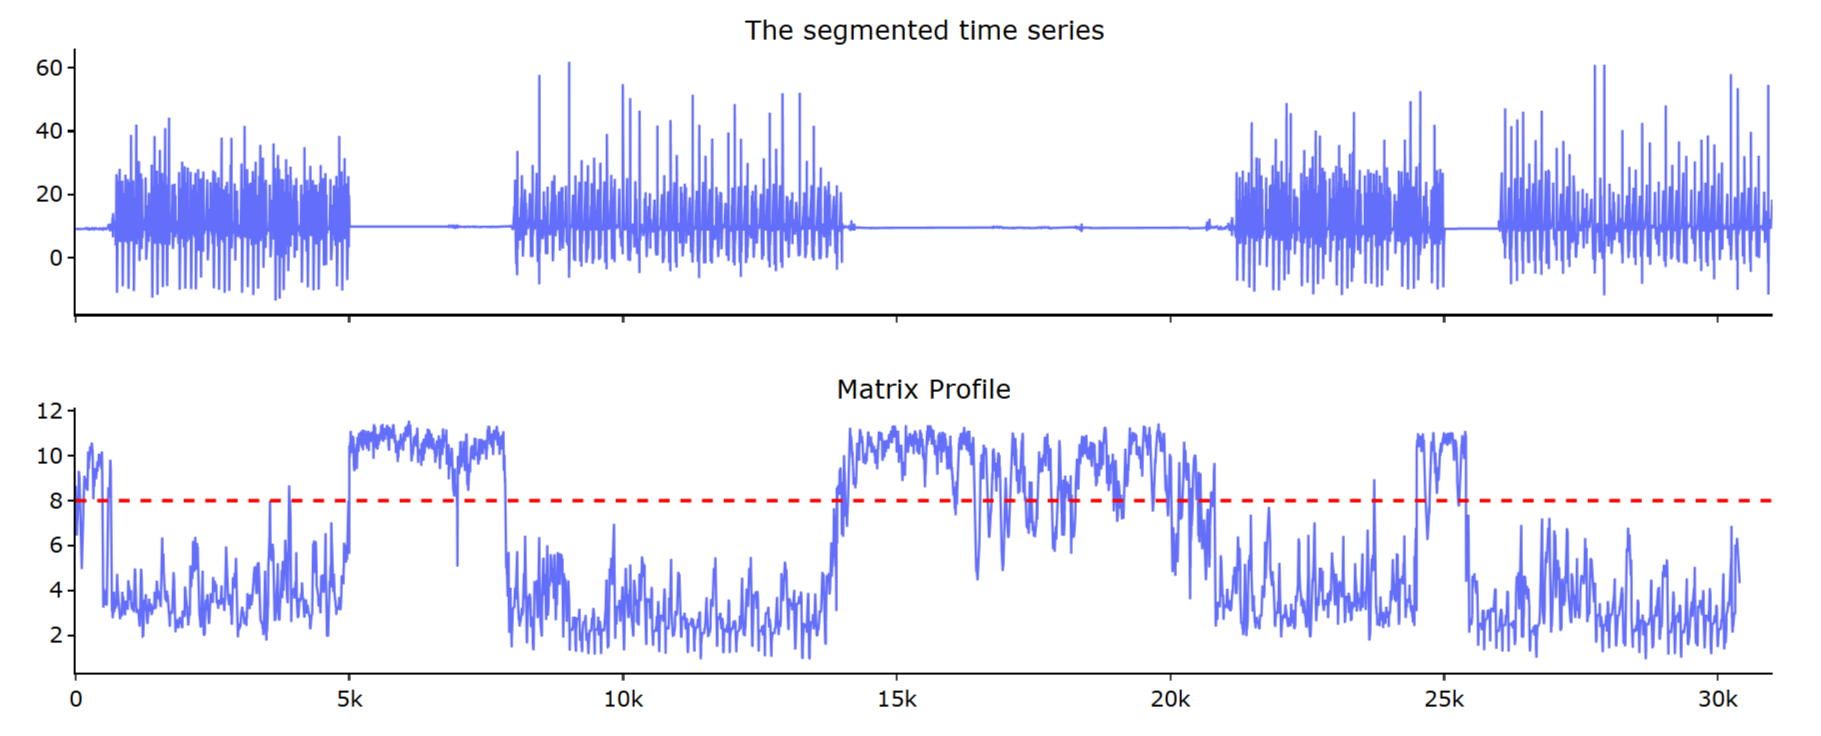

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [33]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Загрузка и предобработка меток
labels_url = './datasets/part2/pamap_labels.csv'
labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

# Обработка меток (замена метки 2 на 1)
labels = np.where(labels == 2, 1, labels)

# Обрезка меток
labels = labels[m:]

# Преобразование mp['mp'] в массив с плавающей точкой и обработка NaN и inf
mp['mp'] = mp['mp'].astype(float)
mp['mp'] = np.where(np.isinf(mp['mp']) | np.isnan(mp['mp']), np.finfo(np.float64).max, mp['mp'])

# Приведение индексов матричного профиля к целым числам и фильтрация
valid_indices = np.clip(mp['mp'].astype(int), 0, len(labels) - 1)
labels = labels[valid_indices]

# Вычисление предсказанных меток на основе порога

labels_pred = (mp['mp'] < threshold).astype(int)

# Вычисление точности
accuracy = accuracy_score(labels, labels_pred)
print("Точность (accuracy):", accuracy)


Точность (accuracy): 0.6868524061708496


## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [35]:
import pandas as pd
import os

In [36]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)

    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, format="%Y-%m-%d %H:%M:%S")


Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [37]:
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

#swap Heads and Tails of 1 and 11
swap1, swap2 = 1, 11


In [38]:
import pandas as pd

# Заменяем append на concat
consumptions[f'House{swap1}'] = pd.concat([heads[f'H_{swap1}'], tails[f'T_{swap2}']])
consumptions[f'House{swap2}'] = pd.concat([heads[f'H_{swap2}'], tails[f'T_{swap1}']])

# Повторное вычисление heads и tails
heads, tails = heads_tails(consumptions, cutoff, house_idx)


Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [39]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

In [40]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

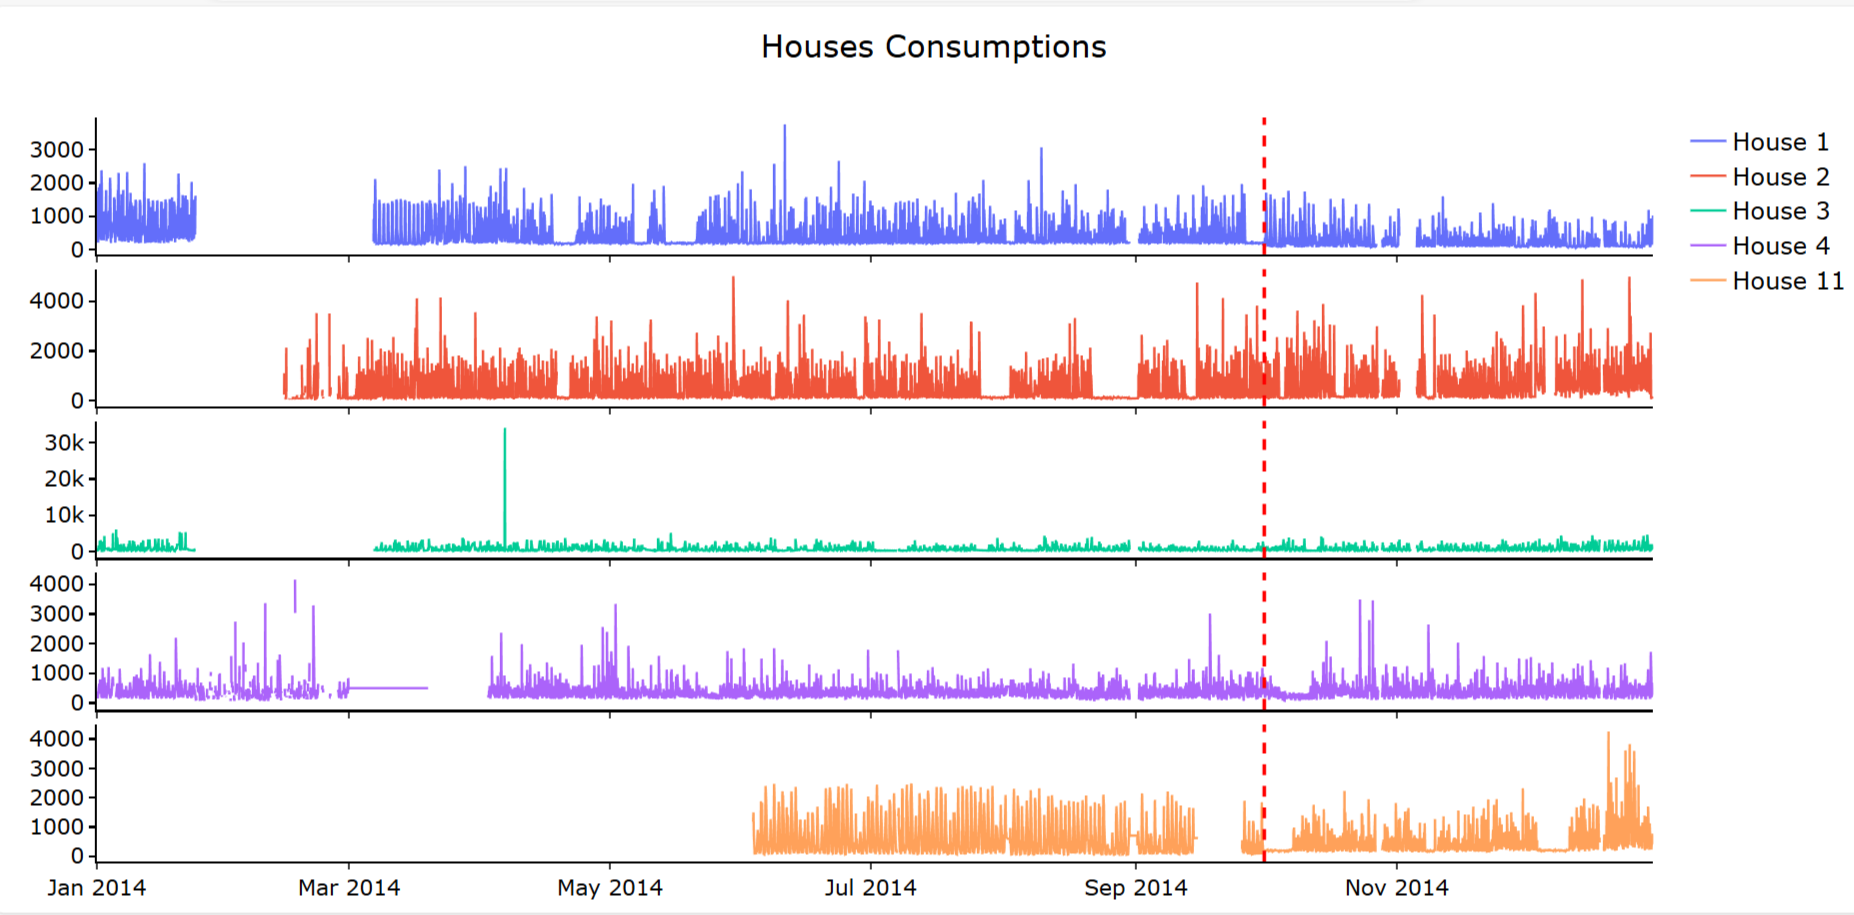

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [ ]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

In [42]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Time series with minimum score is (H_{min_i}, T_{min_j}).')

Time series with minimum score is (H_11, T_1).


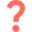
Проанализируйте и изложите содержательный смысл полученных результатов.

**Анализ результатов**

Обнаружена вероятная подмена данных в паре домов (H_11, T_1). Алгоритм выявил, что "хвост" одного временного ряда аномально похож на "голову" другого, что указывает на возможное перепутывание показаний счетчиков между этими двумя домохозяйствами.

**Ключевые моменты:**
- Пара (H_11, T_1) имеет минимальный swap_score
- Низкий score означает аномальное сходство между разными временными рядами
- Это свидетельствует о возможной ошибке в данных или подмене счетчиков